# MSiA 400 - Final Project
## Feature engineering for transaction and sksinfo
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Cheng

In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='user', 
                            password='password', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df_trnsact = pd.read_sql("select * from \"TRNSACT\"order by random() LIMIT 1000000", connection);
sks_df = pd.read_sql("select * from \"SKSTINFO\"", connection);
store_df = pd.read_sql("select * from \"STRINFO\"", connection);
# df_trnsact = pd.read_sql("select * from \"TRNSACT\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


PostgreSQL connection is closed


In [39]:
store_df

,STORE,CITY,STATE,ZIP,EXTRA_COL
0,2,ST. PETERSBURG,FL,33710,0
1,3,ST. LOUIS,MO,63126,0
2,4,LITTLE ROCK,AR,72201,0
3,7,FORT WORTH,TX,76137,0
4,9,TEMPE,AZ,85281,0
...,...,...,...,...,...
448,9808,GILBERT,AZ,85233,0
449,9812,METAIRIE,LA,70006,0
450,9900,LITTLE ROCK,AR,72201,0
451,9906,LITTLE ROCK,AR,72201,0


In [40]:
sks_df

,SKU,STORE,COST,RETAIL,EXTRA_COL,REVENUE
0,3,102,123.36,440.00,0,316.64
1,3,103,123.36,440.00,0,316.64
2,3,104,123.36,440.00,0,316.64
3,3,202,123.36,440.00,0,316.64
4,3,203,123.36,440.00,0,316.64
...,...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,0,4.50
39230142,9999997,2707,15.00,9.75,0,-5.25
39230143,9999997,3307,15.00,19.50,0,4.50
39230144,9999997,7507,15.00,19.50,0,4.50


In [41]:
sks_df['REVENUE'] = sks_df['RETAIL']-sks_df['COST']
df_trnsact_sks = df_trnsact.merge(sks_df,on = ['SKU','STORE'], how = 'left')
df_combined = df_trnsact_sks.merge(store_df,on = ['STORE'], how = 'left')
df_combined

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,...,MIC,EXTRACOL,COST,RETAIL,EXTRA_COL_x,REVENUE,CITY,STATE,ZIP,EXTRA_COL_y
0,3949538,8407,500,03000,672000978,2005-03-26,P,1,49.5,49.50,...,281,0,29.70,49.50,0.0,19.80,LAKE JACKSON,TX,77566,1
1,8980283,5504,290,01200,0,2004-09-20,P,1,6.0,5.00,...,034,0,2.10,6.00,0.0,3.90,PINEVILLE,NC,28134,1
2,4878991,3402,480,01400,0,2005-06-26,P,1,19.5,19.50,...,281,0,11.70,19.50,0.0,7.80,GAINESVILLE,FL,32605,1
3,4628597,2102,550,00400,32901355,2005-04-15,P,1,0.0,0.00,...,281,0,0.00,0.00,0.0,0.00,ORLANDO,FL,32809,1
4,6592840,6703,640,12800,676906719,2005-04-08,P,1,22.5,22.50,...,281,0,13.50,22.50,0.0,9.00,NORTH OLMSTED,OH,44070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,9370294,4802,630,08100,0,2005-05-27,P,1,0.0,0.00,...,643,0,0.00,0.00,0.0,0.00,PANAMA CITY,FL,32405,1
999996,693114,8803,90,02200,217008969,2004-11-27,P,1,17.0,17.00,...,090,0,10.75,17.99,0.0,7.24,LEXINGTON,KY,40504,1
999997,9298440,4109,130,02400,770309823,2005-04-27,P,1,34.0,17.85,...,222,0,12.50,17.00,0.0,4.50,LAS VEGAS,NV,89109,1
999998,3006604,504,550,03000,447000596,2005-01-31,R,1,40.0,40.00,...,121,0,16.00,3.99,0.0,-12.01,LITTLE ROCK,AR,72205,1


In [42]:
df_combined.notnull().sum()

SKU            1000000
STORE          1000000
REGISTER       1000000
TRANNUM        1000000
SEQ            1000000
SALEDATE       1000000
STYPE          1000000
QUANTITY       1000000
ORIGPRICE      1000000
AMT            1000000
INTID          1000000
MIC            1000000
EXTRACOL       1000000
COST            567262
RETAIL          567262
EXTRA_COL_x     567262
REVENUE         567262
CITY           1000000
STATE          1000000
ZIP            1000000
EXTRA_COL_y    1000000
dtype: int64

In [43]:
df_combined['DISCOUNT'] = df_combined['RETAIL'] - df_combined['ORIGPRICE']
df_combined = pd.get_dummies(df_combined, prefix=['STYPE'], columns=['STYPE'])
df_groupyed = df_combined.groupby(['STATE', 'SALEDATE']).agg({'SKU': 'count', 'STYPE_P': 'sum','STYPE_R':'sum','AMT':'sum','REVENUE':'sum','DISCOUNT':'sum' })
df_groupyed = df_groupyed.reset_index()



,STATE,SALEDATE,SKU,STYPE_P,STYPE_R,AMT,REVENUE,DISCOUNT
0,AL,2004-08-01,41,37.0,4,885.90,72.77,-95.01
1,AL,2004-08-02,57,54.0,3,1165.86,105.17,-69.25
2,AL,2004-08-03,51,48.0,3,1279.39,219.71,3.00
3,AL,2004-08-04,54,52.0,2,1115.68,56.17,-134.77
4,AL,2004-08-05,71,65.0,6,1871.73,129.50,-40.00
...,...,...,...,...,...,...,...,...
11266,WY,2005-08-23,2,2.0,0,33.48,17.73,-10.51
11267,WY,2005-08-24,6,6.0,0,60.90,12.10,-47.50
11268,WY,2005-08-25,8,7.0,1,58.35,14.50,-115.89
11269,WY,2005-08-26,13,13.0,0,89.58,32.57,-145.99


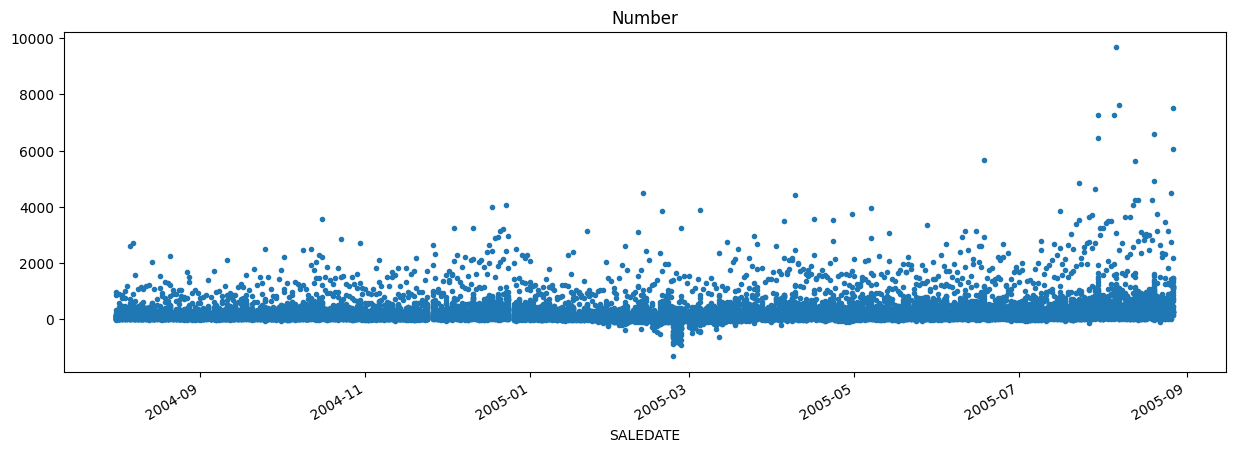

In [47]:
color_pal = sns.color_palette()

df_ts = df_groupyed.set_index('SALEDATE')
df_ts.index = pd.to_datetime(df_ts.index)

df_ts_draw = df_ts["REVENUE"]
df_ts_draw.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Number')
plt.show()


In [48]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df

df_ts = create_features(df_ts)
df_ts

,STATE,SKU,STYPE_P,STYPE_R,AMT,REVENUE,DISCOUNT,hour,dayofweek,quarter,month,year,dayofmonth
SALEDATE,,,,,,,,,,,,,
2004-08-01,AL,41,37.0,4,885.90,72.77,-95.01,0,6,3,8,2004,1
2004-08-02,AL,57,54.0,3,1165.86,105.17,-69.25,0,0,3,8,2004,2
2004-08-03,AL,51,48.0,3,1279.39,219.71,3.00,0,1,3,8,2004,3
2004-08-04,AL,54,52.0,2,1115.68,56.17,-134.77,0,2,3,8,2004,4
2004-08-05,AL,71,65.0,6,1871.73,129.50,-40.00,0,3,3,8,2004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,WY,2,2.0,0,33.48,17.73,-10.51,0,1,3,8,2005,23
2005-08-24,WY,6,6.0,0,60.90,12.10,-47.50,0,2,3,8,2005,24
2005-08-25,WY,8,7.0,1,58.35,14.50,-115.89,0,3,3,8,2005,25


In [49]:
df_model = pd.DataFrame(columns = df_ts.columns)
def create_lag_feature(df):
    df['AMT_1'] = df['AMT'].shift(1)
    df['AMT_3'] = df['AMT'].shift(3)
    df['AMT_6'] = df['AMT'].shift(6)
    df['REVENUE_1'] = df['REVENUE'].shift(1)
    df['REVENUE_3'] = df['REVENUE'].shift(3)
    df['REVENUE_6'] = df['REVENUE'].shift(6)
    df['DISCOUNT_1'] = df['DISCOUNT'].shift(1)
    df['DISCOUNT_3'] = df['DISCOUNT'].shift(3)
    df['DISCOUNT_6'] = df['DISCOUNT'].shift(6)
    
    return df
df_ts_lagged = create_lag_feature(df_ts)

df_ts_lagged
# for store in df_groupyed['STATE'].drop_duplicates().tolist():
#     df_part = df_groupyed[df_groupyed['STATE']==store]
#     df_model = df_model.append(create_lag_feature(df_part))
# df_ts_test

,STATE,SKU,STYPE_P,STYPE_R,AMT,REVENUE,DISCOUNT,hour,dayofweek,quarter,...,dayofmonth,AMT_1,AMT_3,AMT_6,REVENUE_1,REVENUE_3,REVENUE_6,DISCOUNT_1,DISCOUNT_3,DISCOUNT_6
SALEDATE,,,,,,,,,,,,,,,,,,,,,
2004-08-01,AL,41,37.0,4,885.90,72.77,-95.01,0,6,3,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,AL,57,54.0,3,1165.86,105.17,-69.25,0,0,3,...,2,885.90,NaN,NaN,72.77,NaN,NaN,-95.01,NaN,NaN
2004-08-03,AL,51,48.0,3,1279.39,219.71,3.00,0,1,3,...,3,1165.86,NaN,NaN,105.17,NaN,NaN,-69.25,NaN,NaN
2004-08-04,AL,54,52.0,2,1115.68,56.17,-134.77,0,2,3,...,4,1279.39,885.90,NaN,219.71,72.77,NaN,3.00,-95.01,NaN
2004-08-05,AL,71,65.0,6,1871.73,129.50,-40.00,0,3,3,...,5,1115.68,1165.86,NaN,56.17,105.17,NaN,-134.77,-69.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,WY,2,2.0,0,33.48,17.73,-10.51,0,1,3,...,23,54.50,91.48,29.99,29.71,-4.32,0.00,-15.00,-106.01,0.00
2005-08-24,WY,6,6.0,0,60.90,12.10,-47.50,0,2,3,...,24,33.48,5.80,294.98,17.73,1.34,106.06,-10.51,-8.88,-49.01
2005-08-25,WY,8,7.0,1,58.35,14.50,-115.89,0,3,3,...,25,60.90,54.50,73.18,12.10,29.71,32.10,-47.50,-15.00,-43.32


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_ts_lagged = pd.get_dummies(df_ts_lagged)
df_ts_lagged
# df_ts_lagged['STATE']= label_encoder.fit_transform(df_ts_lagged['STATE'])

,SKU,STYPE_P,STYPE_R,AMT,REVENUE,DISCOUNT,hour,dayofweek,quarter,month,...,STATE_NM,STATE_NV,STATE_OH,STATE_OK,STATE_SC,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WY
SALEDATE,,,,,,,,,,,,,,,,,,,,,
2004-08-01,41,37.0,4,885.90,72.77,-95.01,0,6,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-02,57,54.0,3,1165.86,105.17,-69.25,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-03,51,48.0,3,1279.39,219.71,3.00,0,1,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-04,54,52.0,2,1115.68,56.17,-134.77,0,2,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-05,71,65.0,6,1871.73,129.50,-40.00,0,3,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-23,2,2.0,0,33.48,17.73,-10.51,0,1,3,8,...,0,0,0,0,0,0,0,0,0,1
2005-08-24,6,6.0,0,60.90,12.10,-47.50,0,2,3,8,...,0,0,0,0,0,0,0,0,0,1
2005-08-25,8,7.0,1,58.35,14.50,-115.89,0,3,3,8,...,0,0,0,0,0,0,0,0,0,1


In [51]:
df_ts_lagged["STYPE_R"] = df_ts_lagged["STYPE_R"].astype(int)
df_ts_lagged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11271 entries, 2004-08-01 to 2005-08-27
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SKU         11271 non-null  int64  
 1   STYPE_P     11271 non-null  float64
 2   STYPE_R     11271 non-null  int64  
 3   AMT         11271 non-null  float64
 4   REVENUE     11271 non-null  float64
 5   DISCOUNT    11271 non-null  float64
 6   hour        11271 non-null  int64  
 7   dayofweek   11271 non-null  int64  
 8   quarter     11271 non-null  int64  
 9   month       11271 non-null  int64  
 10  year        11271 non-null  int64  
 11  dayofmonth  11271 non-null  int64  
 12  AMT_1       11270 non-null  float64
 13  AMT_3       11268 non-null  float64
 14  AMT_6       11265 non-null  float64
 15  REVENUE_1   11270 non-null  float64
 16  REVENUE_3   11268 non-null  float64
 17  REVENUE_6   11265 non-null  float64
 18  DISCOUNT_1  11270 non-null  float64
 19  DISCOUNT

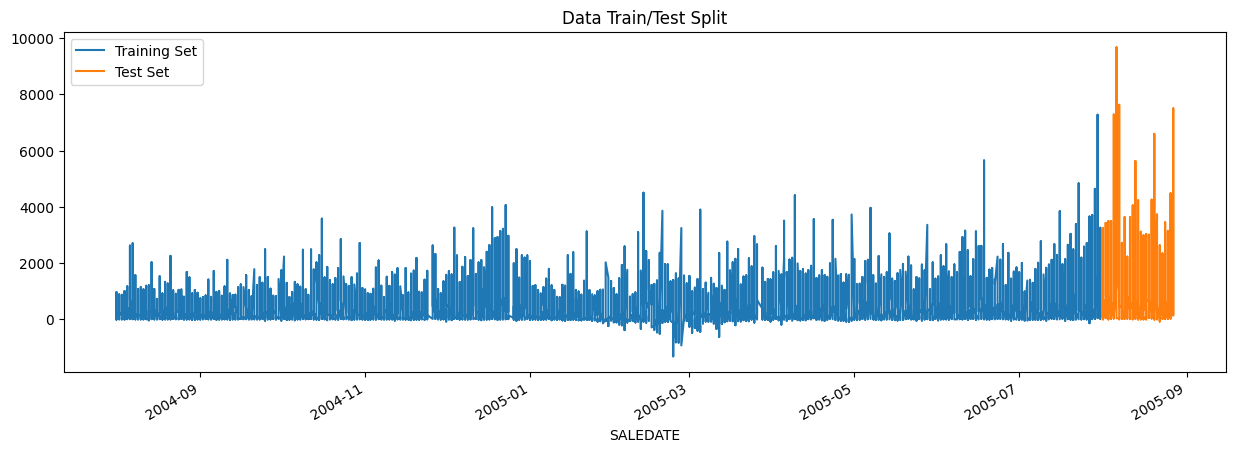

In [52]:
df_ts = df_ts_lagged
train = df_ts.loc[df_ts.index < '08-01-2005']
test = df_ts.loc[df_ts.index >= '08-01-2005']
train_ts_draw = train["REVENUE"]
test_ts_draw = test["REVENUE"]

fig, ax = plt.subplots(figsize=(15, 5))
train_ts_draw.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [53]:
X_train = train.drop('REVENUE', axis = 1)
y_train = train['REVENUE']
X_test = test.drop('REVENUE', axis = 1)
y_test = test['REVENUE']

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10488 entries, 2004-08-01 to 2005-07-31
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SKU         10488 non-null  int64  
 1   STYPE_P     10488 non-null  float64
 2   STYPE_R     10488 non-null  int64  
 3   AMT         10488 non-null  float64
 4   DISCOUNT    10488 non-null  float64
 5   hour        10488 non-null  int64  
 6   dayofweek   10488 non-null  int64  
 7   quarter     10488 non-null  int64  
 8   month       10488 non-null  int64  
 9   year        10488 non-null  int64  
 10  dayofmonth  10488 non-null  int64  
 11  AMT_1       10487 non-null  float64
 12  AMT_3       10485 non-null  float64
 13  AMT_6       10482 non-null  float64
 14  REVENUE_1   10487 non-null  float64
 15  REVENUE_3   10485 non-null  float64
 16  REVENUE_6   10482 non-null  float64
 17  DISCOUNT_1  10487 non-null  float64
 18  DISCOUNT_3  10485 non-null  float64
 19  DISCOUNT

In [56]:
import xgboost as xgb

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=2000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[14:59:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:505.46957	validation_1-rmse:1133.14994
[100]	validation_0-rmse:251.98896	validation_1-rmse:781.38827
[200]	validation_0-rmse:173.56639	validation_1-rmse:606.43508
[300]	validation_0-rmse:148.00572	validation_1-rmse:529.88346
[400]	validation_0-rmse:136.11057	validation_1-rmse:501.48046
[500]	validation_0-rmse:129.74626	validation_1-rmse:486.84202
[600]	validation_0-rmse:125.41064	validation_1-rmse:476.83347
[700]	validation_0-rmse:121.88474	validation_1-rmse:472.43329
[800]	validation_0-rmse:119.04157	validation_1-rmse:466.68685
[900]	validation_0-rmse:116.67625	validation_1-rmse:461.55315
[1000]	validation_0-rmse:114.10219	validation_1-rmse:459.09106
[1019]	validation_0-rmse:113.69371	validation_1-rmse:460.71003


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

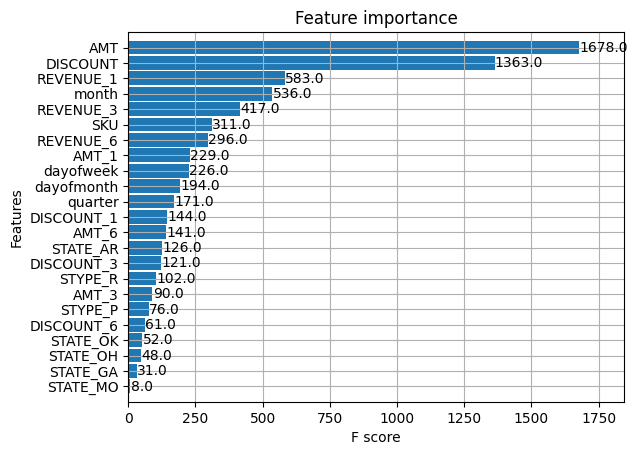

In [62]:
from xgboost import plot_importance, plot_tree

_ = plot_importance(reg, height=0.9)


In [63]:
y_pred = reg.predict(X_test)
X_test['prediction'] = y_pred
test_pred = pd.concat([X_test, X_train], sort=False)

In [77]:
test_ts_draw = test["REVENUE"]
pjme_all_plot = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
pjme_all_plot.plot(ax=ax, label='prediction Set', title='Data Train/Test Split')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['prediction Set', 'Test Set'])
plt.show()

NameError: name 'test_pred' is not defined

In [76]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

210312.57183271082
458.59848651375944
